# Temperature By Countries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from scipy import stats
from datetime import datetime
from math import *
from util import *

plt.rcParams["figure.figsize"] = (15, 8)

## Parseo datos

In [2]:
df = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv', parse_dates=[0])
#Me quedo con las que la temperatura no esta vacia
df = df[df.AverageTemperature.notnull()]

#Nombre columnas: dt, AverageTemperature, AverageTemperatureUncertainty, Country

#Parseo las fechas. Estas no pueden ser un timestamp porque tenemos que operar con ellas (son los x)
# Esta dividido por 10000 para que quede el año como la parte entera y los graficos tengan los ejes con él
#df['dt']= df['dt'].apply(lambda x: float(x.translate({ord('-'): None})))
first_day = datetime(1743, 1, 1)
df['days']= df['dt'].apply(lambda x: (x - first_day).days)
print(df.head())


groupByCountries = df.groupby('Country')

          dt  AverageTemperature  AverageTemperatureUncertainty Country  days
0 1743-11-01               4.384                          2.294   Åland   304
5 1744-04-01               1.530                          4.680   Åland   456
6 1744-05-01               6.702                          1.789   Åland   486
7 1744-06-01              11.609                          1.577   Åland   517
8 1744-07-01              15.342                          1.410   Åland   547


## Test con los datos de Argentina

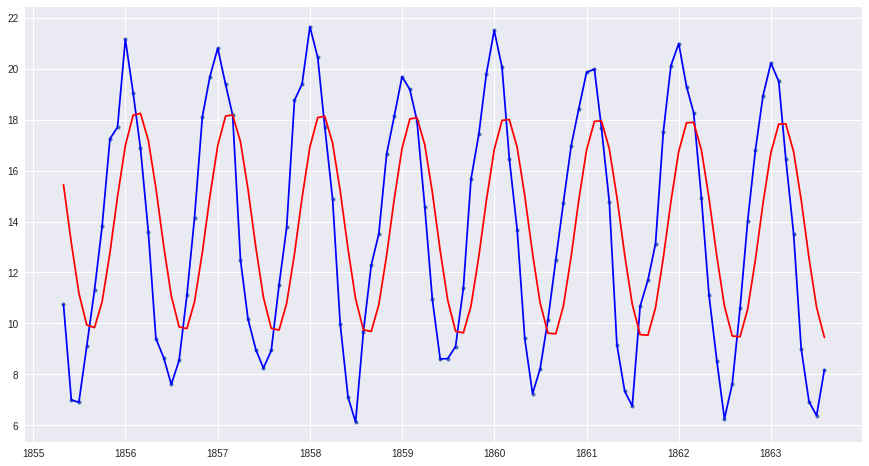

In [3]:
#Genero una especie de dataframe con los datos de argentina
ezeWants=100
gArg = groupByCountries.get_group('Argentina')
argFechas = list(gArg['days'][:ezeWants])
argTemp = list(gArg['AverageTemperature'][:ezeWants])

model = lambda x: [sin(x*2*pi/365 + 365/2), float(x), 1.0]

func = cml(model, argFechas, argTemp)
results = list(map(func, argFechas))
#print("ECM =", ecm(argFechas, results))

#loly = argTemp[:100]
#lolx = a[:100]
#func = cml(poly(9), lolx, loly)
#results2 = list(map(func, lolx))

#print("ECM = ", ecm(argFechas, results))

plt.plot(gArg["dt"][:ezeWants], argTemp, 'o', label='Temperatura', markersize=4)
plt.plot(gArg["dt"][:ezeWants], argTemp, 'r', label='Temperatura', markersize=4, color='blue')
plt.plot(gArg["dt"][:ezeWants], results, 'r', label='Temperatura', markersize=4, color='red')
#plt.plot(lolx, results2, 'r')
#plt.plot(a, argTemp, 'o', label='Temperatura', markersize=4)
#plt.plot(argFechas, results, 'r')
plt.show()

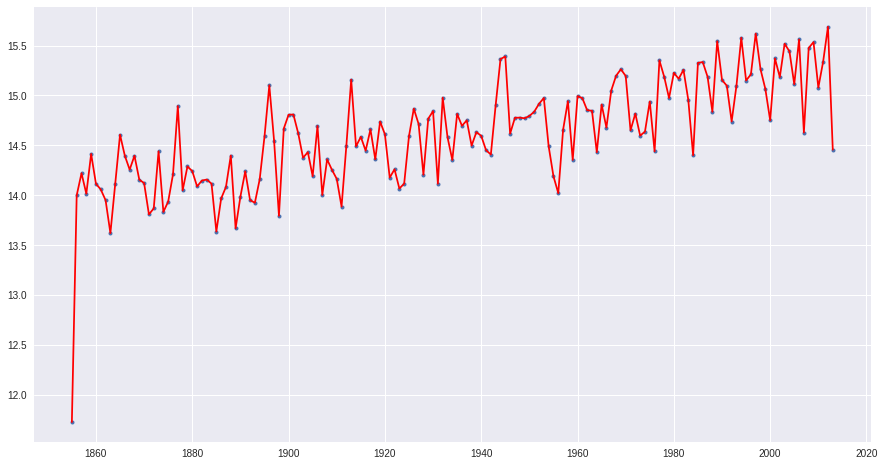

In [4]:
gArg2 = pd.DataFrame(gArg)
gArg2['year'] = gArg2["dt"].apply(lambda d: d.year)
gg = gArg2.groupby("year")["AverageTemperature"].agg(["mean", "count"])

plt.plot(gg.index, gg['mean'], 'o', label='Temperatura', markersize=4)
plt.plot(gg.index, gg['mean'], 'r', label='Temperatura', markersize=4)

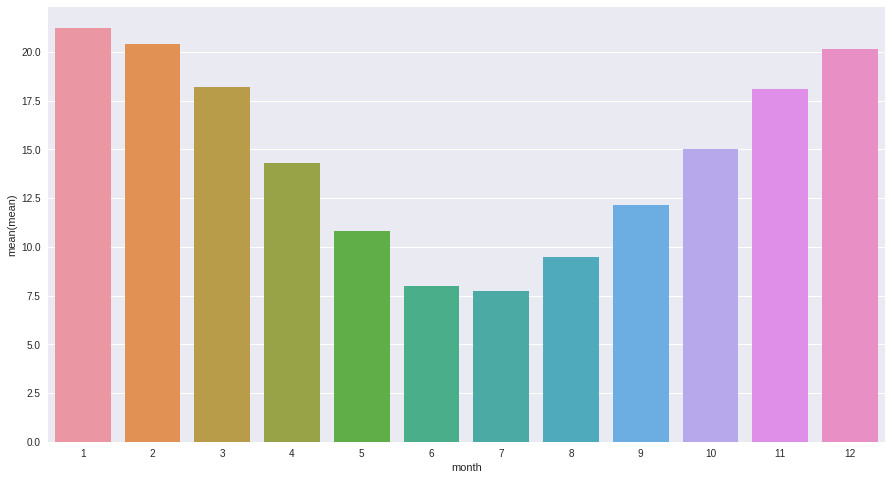

In [5]:
gArg2 = pd.DataFrame(gArg)
gArg2['month'] = gArg2["dt"].apply(lambda d: d.month)
gg = gArg2.groupby("month")["AverageTemperature"].agg(["mean", "count"])
gg["month"] = gg.index

sns.barplot(x="month", y="mean", data=gg)

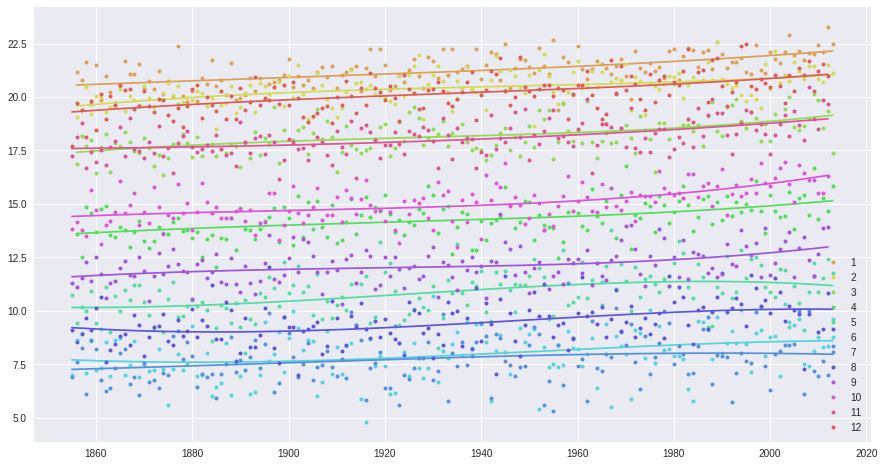

In [6]:
gArg2 = pd.DataFrame(gArg)
gArg2['month'] = gArg2["dt"].apply(lambda d: d.month)

p = sns.color_palette("hls", 12)


for x in range(1, 13):
    d = gArg2[gArg2["month"] == x]
    
    f = cml(poly(5), list(d["year"]), list(d["AverageTemperature"]))
    results = list(map(f, list(d["year"])))
    
    plt.plot(d["year"], d['AverageTemperature'], 'o', markersize=4, label=x, color=p[x % 12])
    plt.plot(d["year"], results, 'r', color=p[x % 12])
    
plt.legend()